## Observations and Insights 

By looking at the Tumor Volume vs Drug Regimen figure, Capomulin performed very close to Ramicane. The difference in the interquartile range between Capomulin and Ramicane is only 0.2547, but the median is lower on Ramicane. According to the quartiles, Ramicane is performing marginally better at reducing the tumor volume than Capomulin. It is likely not statistically significant. Capomulin can reduce the tumor volume significantly more than Infubinol and Ceftamin because there are no quartile overlaps with Capomulin. 

For mouse i557, the tumor volume did see a decline in the first 5 days of treatment. The inflection point is right at day 5, where the tumor volume steadily increased till day 45 which is the end of the experiment. 

Looking at the Average Tumor Volume vs Average Mouse Weight figure, the linear regression model is a close fit to the data with a r-value of 0.842. There is a strong correlation between the average tumor volume and the average mouse weight. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, how ="left", on =["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
combined.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_data = combined[combined.duplicated(['Mouse ID', 'Timepoint'])]

bad_mouse = dup_data["Mouse ID"].unique()
bad_mouse[0]


'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
indexmouse = combined.set_index("Mouse ID")
dup_mouse = indexmouse.loc[bad_mouse[0], :]

dup_mouse


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_dup_mouse = indexmouse.drop(bad_mouse[0])

drop_dup_mouse

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_data = drop_dup_mouse.reset_index()

mouse_data.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_data = mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]

tumor_mean = regimen_data.mean()
tumor_median = regimen_data.median()
tumor_var = regimen_data.var()
tumor_std = regimen_data.std()
tumor_se = regimen_data.sem()

# print(f'mean: {tumor_mean}')
# print(f'median: {tumor_median}')
# print(f'variance: {tumor_var}')
# print(f'standard deviation: {tumor_std}')
# print(f'standard error of mean: {tumor_se}')

summary_tumor = pd.DataFrame({"Tumor Volume Mean": tumor_mean, 
                              "Tumor Volume Median": tumor_median, 
                              "Tumor Volume Variance": tumor_var, 
                              "Tumor Volume Std Devn": tumor_std,
                              "Tumor Volume Std Err": tumor_se
                             })

summary_tumor



,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Devn,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_data.agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

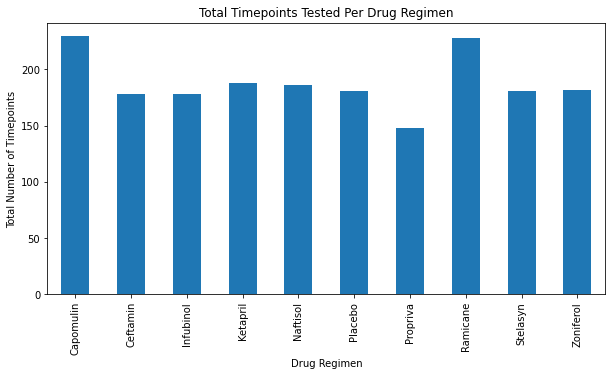

In [9]:
#### Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#filter df for just timepoint and drug regimen
regimen_time_point = mouse_data[["Timepoint", "Drug Regimen"]]

#determining the total number of timepoints

total_tp = regimen_time_point.groupby(["Drug Regimen"])["Timepoint"].count()

#total_tp

#creating bar chart
total_tp.plot(kind = "bar", figsize = (10, 5))

# set title and label axes
plt.title("Total Timepoints Tested Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

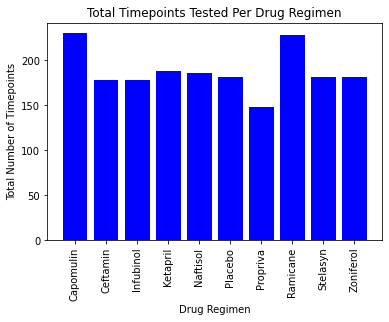

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#set x_axis 
x_axis = total_tp.index

#plot bar chart
plt.bar(x_axis, total_tp, color = "b", align = "center")

# set title and label axes
plt.title("Total Timepoints Tested Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")

#rotate text to fit the chart
plt.xticks(rotation="vertical")

plt.show

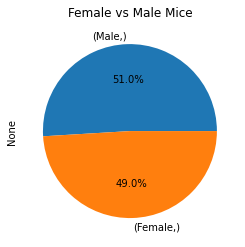

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#filter mouse data via sex
mouse_mf = mouse_data[["Sex"]].value_counts()
# mouse_mf

#generate pie chart
mouse_mf.plot(kind = "pie", autopct = "%1.1f%%")
plt.title("Female vs Male Mice")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

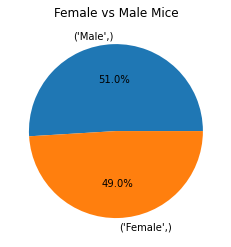

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#generate pie chart
plt.pie(mouse_mf,labels = mouse_mf.index, autopct = "%1.1f%%")
plt.title("Female vs Male Mice")
plt.show

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
all_drug_data = mouse_data[mouse_data["Drug Regimen"]== "Capomulin"]
tp_data = all_drug_data["Timepoint"].max()

# keeping the last timepoint
#final time point for Capomulin
max_cap = all_drug_data[all_drug_data["Timepoint"] == tp_data]
max_cap

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
134,r554,Capomulin,Female,8,17,45,32.377357,3
144,m957,Capomulin,Female,3,19,45,33.329098,1
164,t565,Capomulin,Female,20,17,45,34.455298,0
204,i738,Capomulin,Female,23,20,45,37.311846,2
224,w914,Capomulin,Male,24,21,45,36.041047,2


In [14]:
#final time point for Ramicane

all_drug_data = mouse_data[mouse_data["Drug Regimen"]== "Ramicane"]
tp_data = all_drug_data["Timepoint"].max()
max_rami = all_drug_data[all_drug_data["Timepoint"] == tp_data]
max_rami

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0
94,j913,Ramicane,Female,4,17,45,31.560470,1
114,n364,Ramicane,Male,4,17,45,31.095335,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
174,a644,Ramicane,Female,7,17,45,32.978522,1
184,i177,Ramicane,Male,10,18,45,33.562402,3


In [15]:
#final time point for Infubinol

all_drug_data = mouse_data[mouse_data["Drug Regimen"]== "Infubinol"]
tp_data = all_drug_data["Timepoint"].max()
max_infu = all_drug_data[all_drug_data["Timepoint"] == tp_data]
max_infu

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
540,a685,Infubinol,Male,8,30,45,66.083066,3
637,c139,Infubinol,Male,11,28,45,72.226731,2
800,e476,Infubinol,Male,23,26,45,62.435404,1
834,f345,Infubinol,Male,23,26,45,60.918767,1
1040,k483,Infubinol,Female,20,30,45,66.196912,3
1800,y163,Infubinol,Female,17,27,45,67.685569,3
1859,z581,Infubinol,Female,24,25,45,62.754451,3


In [16]:
#final time point for Ceftamin

all_drug_data = mouse_data[mouse_data["Drug Regimen"]== "Ceftamin"]
tp_data = all_drug_data["Timepoint"].max()
max_ceft = all_drug_data[all_drug_data["Timepoint"] == tp_data]
max_ceft

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
493,a275,Ceftamin,Female,20,28,45,62.999356,3
980,j296,Ceftamin,Female,24,30,45,61.849023,3
1020,k210,Ceftamin,Male,15,28,45,68.923185,3
1099,l471,Ceftamin,Female,7,28,45,67.748662,1
1119,l661,Ceftamin,Male,18,26,45,59.851956,3
1149,l733,Ceftamin,Female,4,30,45,64.299830,1
1247,o287,Ceftamin,Male,2,28,45,59.741901,4
1366,p438,Ceftamin,Female,11,26,45,61.433892,1
1657,w151,Ceftamin,Male,24,25,45,67.527482,3
1760,x581,Ceftamin,Female,19,28,45,64.634949,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol =[]

   
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 

# for loop

for each in treatments:

    all_drug_data = mouse_data[mouse_data["Drug Regimen"]== each]
    tp_data = all_drug_data["Timepoint"].max()
    max_drug = all_drug_data[all_drug_data["Timepoint"] == tp_data]
    drug_final = max_drug["Tumor Volume (mm3)"]
    final_tumor_vol.append(drug_final)
        
# zip treatments and final_tumor_vol into a dictionary 
tumor_zip = dict(zip(treatments, final_tumor_vol))

#Calculate the IQR and quantitatively determine if there are any potential outliers.
# Determine outliers using upper and lower bounds

for each in tumor_zip:
    quartiles = tumor_zip[each].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print("--------------------")
    print(f"The lower quartile of {each} is: {lowerq}")
    print(f"The upper quartile of {each} is: {upperq}")
    print(f"The interquartile range of {each} is: {iqr}")
    print(f"Values below {lower_bound} could be {each} outliers.")
    print(f"Values above {upper_bound} could be {each} outliers.")
    print("--------------------")

--------------------
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be Capomulin outliers.
Values above 51.83201549 could be Capomulin outliers.
--------------------
--------------------
The lower quartile of Ramicane is: 30.981175225
The upper quartile of Ramicane is: 38.5083053075
The interquartile range of Ramicane is: 7.527130082500001
Values below 19.69048010125 could be Ramicane outliers.
Values above 49.79900043125001 could be Ramicane outliers.
--------------------
--------------------
The lower quartile of Infubinol is: 62.75445141
The upper quartile of Infubinol is: 67.68556862
The interquartile range of Infubinol is: 4.9311172099999965
Values below 55.35777559500001 could be Infubinol outliers.
Values above 75.08224443499999 could be Infubinol outliers.
--------------------
--------------------
The lower quartile of Ceftamin is: 61.4

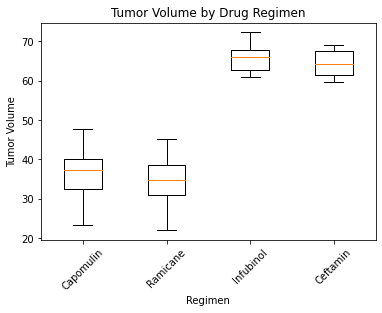

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
 #     plt.boxplot(cap_final)   
plt.boxplot(final_tumor_vol)    
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], treatments, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

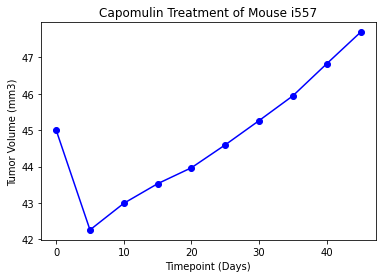

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# select a mouse, i557
select_mouse = mouse_data[mouse_data["Mouse ID"]== "i557"]
select_tumor = select_mouse["Tumor Volume (mm3)"]
select_time = select_mouse["Timepoint"]

plt.plot(select_time, select_tumor, color ='blue', marker = "o")
plt.title('Capomulin Treatment of Mouse i557')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

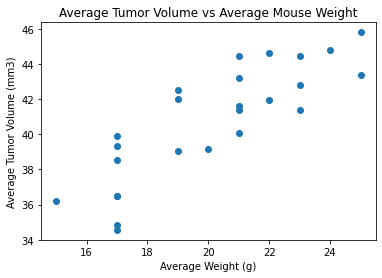

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_data = mouse_data[mouse_data["Drug Regimen"]== "Capomulin"]
avg_weight = cap_data.groupby(["Mouse ID"])["Weight (g)"].mean()
avg_tumor = cap_data.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

plt.scatter(avg_weight, avg_tumor)
plt.title('Average Tumor Volume vs Average Mouse Weight')
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The r-squared is: 0.7088568047708723


<function matplotlib.pyplot.show(close=None, block=None)>

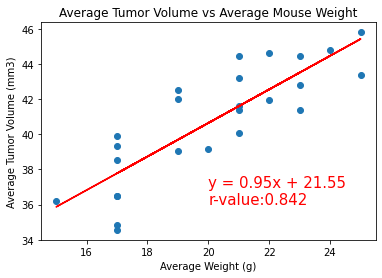

In [41]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weight, avg_tumor)
regress_values = avg_weight * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(avg_weight,avg_tumor)

# draw our regression line
plt.plot(avg_weight,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(20,36), fontsize = 15, color = "red")
#labeling 
plt.title('Average Tumor Volume vs Average Mouse Weight')
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(f"The r-squared is: {rvalue**2}")
plt.show